In [1]:
import pysam
import numpy as np
import cPickle as pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

-----------------

### Mapping statistics

In [6]:
multi = {}
xc = 'CCCTGG'

In [8]:
#st.reset();
for r in reads: #st.head(1000):
    if not r.is_unmapped and r.get_tag('XC')==xc and r.get_tag('NH') > 1:
        
        #xm = r.get_tag('XM')
        qname = r.query_name
        mq = r.mapping_quality
        nm = r.get_tag('NM')
        
        if qname in multi:
            multi[qname].append(nm)
        else:
            multi.update({qname:[nm]})

KeyboardInterrupt: 

In [5]:
multi = pickle.load(open('/data/UMI/data/MUS/PKL/multi.pkl', 'r'))

In [168]:
no_stats = []
for q in multi:
    no_stats.append(len(multi[q]))

In [169]:
from collections import Counter
mapping_stats = Counter(no_stats)

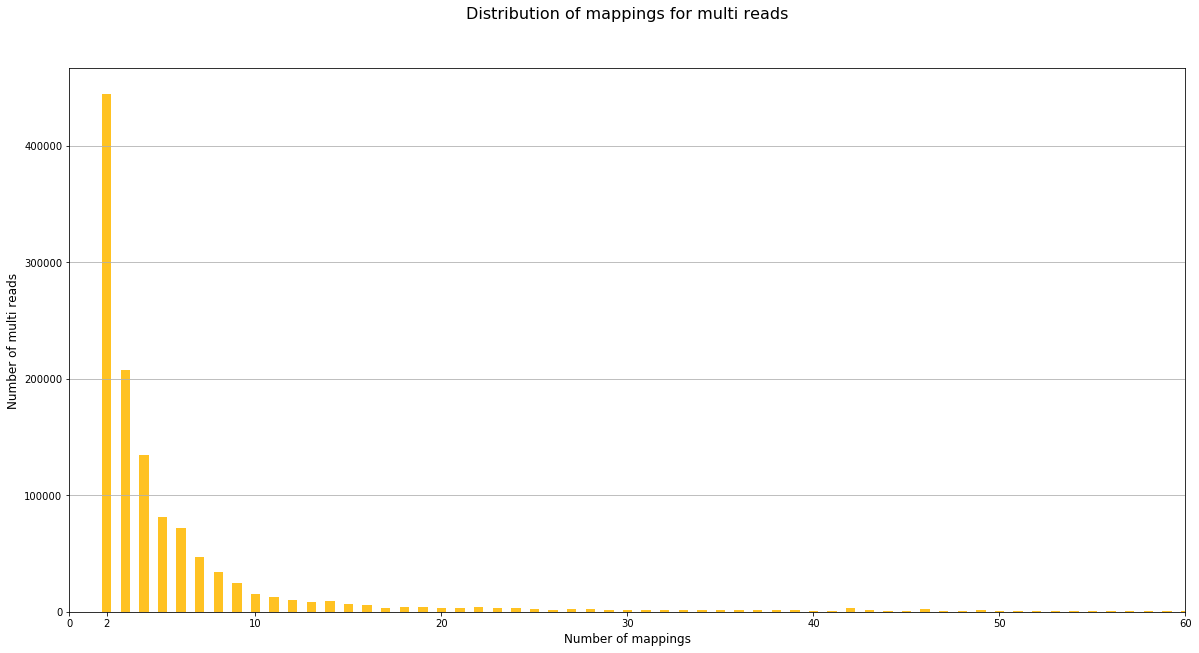

In [176]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.grid()
ax = plt.subplot(111)
plt.title('Distribution of mappings for multi reads', y=1.08, fontsize=16)
plt.xlabel('Number of mappings', fontsize=12)
plt.ylabel('Number of multi reads', fontsize=12)
#plt.ylim(0, 1000)
#plt.xlim(data1[0], data1[-1])
x_ticks = range(0, max(mapping_stats.keys()), 10)
x_ticks.append(min(mapping_stats.keys()))
plt.xticks(x_ticks)
ax.xaxis.grid()
plt.xlim(0, 60)
ax.bar(mapping_stats.keys(), mapping_stats.values(), width=0.5, color='#FFC222')
plt.savefig('mapping_dist')

In [ ]:
twos = []
for q in multi:
    if len(multi[q]) == 2:
        twos.append(tuple(multi[q]))

In [ ]:
#Counter(twos)
c = Counter(map(frozenset, twos))
heats = {tuple(s): count for s, count in c.most_common()}

In [ ]:
a = np.zeros((17, 17))

In [ ]:
#AAAGTT  ATATAG  ATCAAA  CCCTGG  CCGGAC  GACCGC  GGCGTC  GTTCGA  TAAAGT  TCTGCA  TTAATC

In [ ]:
for h in heats:
    if len(h) == 1:
        val = heats[h]
        heats.pop(h)
        h = (h[0], h[0])
        heats.update({h:val})

In [ ]:
for h in heats:
    i, j = h
    a[i][j] = heats[h]

In [ ]:
for h in heats:
    i, j = h
    a_scaled[i][j] = log(heats[h])

-----------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
a_scaled = StandardScaler().fit_transform(a)

In [ ]:
from math import log

In [ ]:
fig = plt.figure(figsize=(20, 10))
heatmap = plt.imshow(a, cmap=plt.cm.Reds)
heatmap.remove()
plt.title('Mismatch heatmap for multi reads with two mappings', y=1.08, fontsize=16)
plt.xlabel('mismatch size', fontsize=12)
plt.ylabel('mismatch size', fontsize=12)
plt.imshow(a_scaled, cmap=plt.cm.Reds, origin='lower')
plt.colorbar(heatmap)
plt.show();
plt.savefig('mismatch_hmap_2')

In [29]:
def diffs(l):
    return len(np.unique(l))

In [131]:
for i in range(2, 102, 1):
    locals()['mapping_%d' %i] = []

In [132]:
for i in range(2, 102, 1):
    for q in multi:
        if len(multi[q]) == i:
            locals()['mapping_%d' %i].append(multi[q])

In [133]:
for i in range(2, 102, 1):
    df = [diffs(l) for l in locals()['mapping_%d' %i]]
    locals()['diffs_%d' %i] = Counter(df)

In [64]:
diffs_100

Counter({1: 102, 2: 9})

In [70]:
def round_more(dict):
    new_dict = {}
    new_key = 'More'
    new_val = 0
    
    for k in dict:
        if k > 2:
            new_val += dict[k]
        else:
            new_dict.update({k:dict[k]})
            
    if new_val:
        new_dict.update({new_key:new_val})
        
    return new_dict

In [134]:
for i in range(2, 102, 1):
    locals()['df_%d' %i] = round_more(locals()['diffs_%d' %i])

In [135]:
for i in range(2, 102, 1):
    locals()['labels_%d' %i] = locals()['df_%d' %i].keys()
    locals()['sizes_%d' %i] = locals()['df_%d' %i].values()

In [136]:
cs = ['#FFC222','#F78F1E', '#EE3224']

In [137]:
rows = 2
cols = 4
plots = 100

In [116]:
def new_pos(i, j, rows = rows, cols = cols):
    
    if j == cols -1:
        i += 1
        j = 0
    else:
        j += 1
    
    return i, j

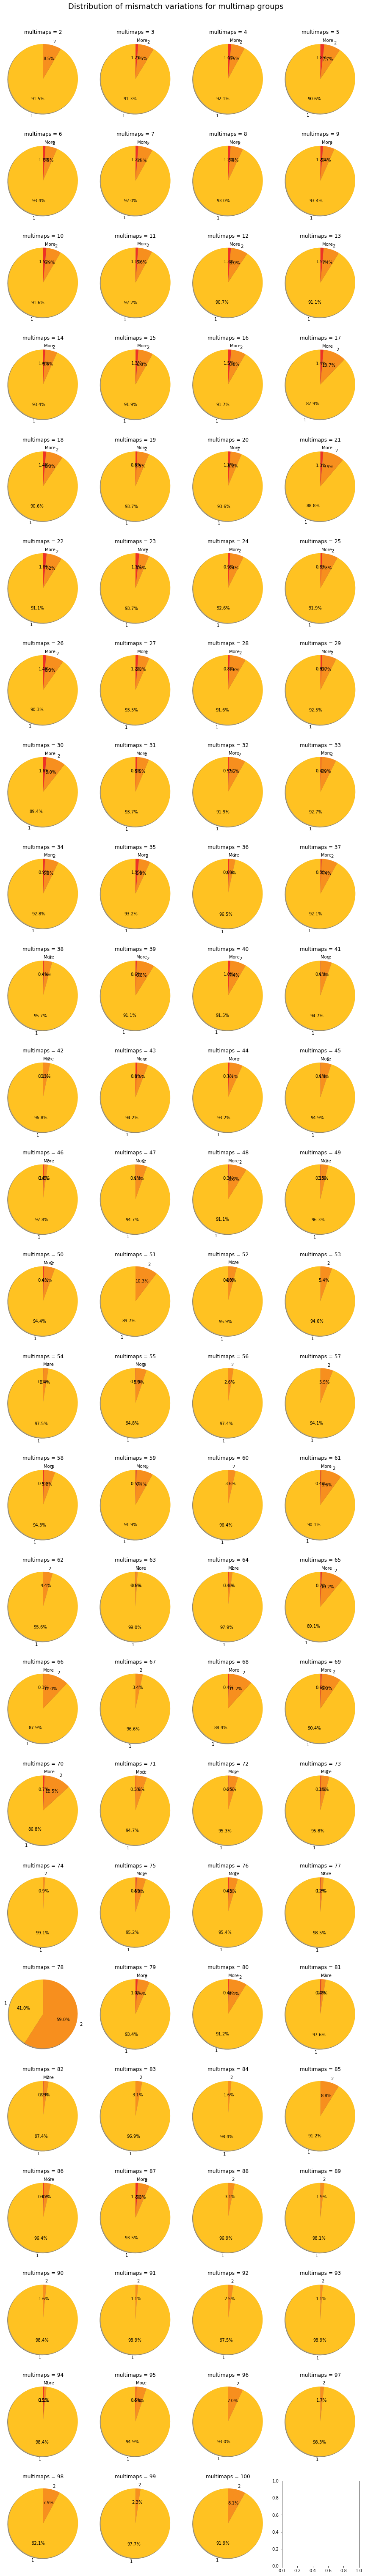

In [167]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

total_rows = plots / cols 
# Four polar axes
f, axarr = plt.subplots(total_rows, cols, figsize=(15,110))


i = j = 0

for item in range(2, 101, 1):
    
    l = locals()['labels_%d' %item]
    s = locals()['sizes_%d' %item]
    
    axarr[i, j].pie(s, labels = l, autopct='%1.1f%%', shadow=True, startangle=90, colors=cs)
    axarr[i, j].axis('equal')
    axarr[i, j].set_title('multimaps = %d' %item)
    
    i, j = new_pos(i, j)

# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.2, wspace= None)
plt.suptitle('Distribution of mismatch variations for multimap groups', fontsize= 18, y= .89)

#plt.show()
plt.savefig('mm_dist')